In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read, pre-process and visualize data

In [2]:
# fetch data 
diab = 0
if diab == 0: 
    raw_data = pd.read_csv('cereal.csv')
else: 
    raw_data = pd.read_csv('diabetes.csv')

raw_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.00,5.00,6,280,25,3,1.00,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.00,8.00,8,135,0,3,1.00,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.00,7.00,5,320,25,3,1.00,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.00,8.00,0,330,25,3,1.00,0.50,93.70
4,Almond Delight,R,C,110,2,2,200,1.00,14.00,8,-1,25,3,1.00,0.75,34.38


In [3]:
raw_data.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [4]:
cols = raw_data.columns
print(cols)
raw_data[cols].mean()
raw_data[cols].std()

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


/var/folders/zk/_ry6kb852zb7th8syz9wtgf00000gn/T/ipykernel_3655/1818900398.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  raw_data[cols].mean()


calories   106.88
protein      2.55
fat          1.01
sodium     159.68
fiber        2.15
carbo       14.60
sugars       6.92
potass      96.08
vitamins    28.25
shelf        2.21
weight       1.03
cups         0.82
rating      42.67
dtype: float64

/var/folders/zk/_ry6kb852zb7th8syz9wtgf00000gn/T/ipykernel_3655/1818900398.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  raw_data[cols].std()


calories   19.48
protein     1.09
fat         1.01
sodium     83.83
fiber       2.38
carbo       4.28
sugars      4.44
potass     71.29
vitamins   22.34
shelf       0.83
weight      0.15
cups        0.23
rating     14.05
dtype: float64

<AxesSubplot:>

name


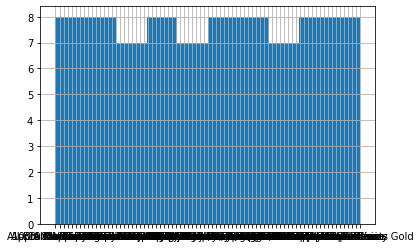

<AxesSubplot:>

mfr


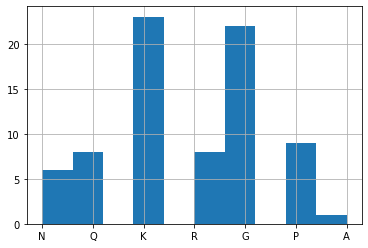

<AxesSubplot:>

type


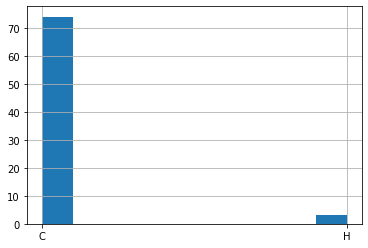

<AxesSubplot:>

calories


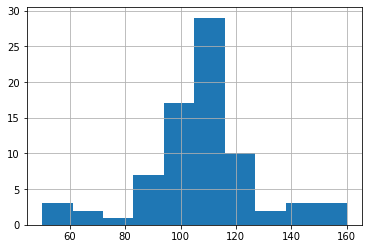

<AxesSubplot:>

protein


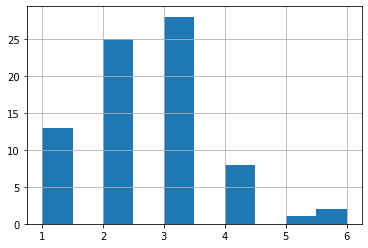

<AxesSubplot:>

fat


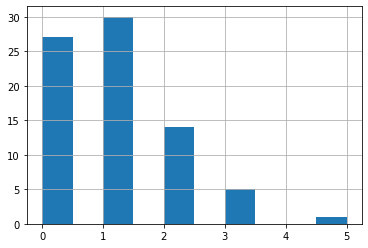

<AxesSubplot:>

sodium


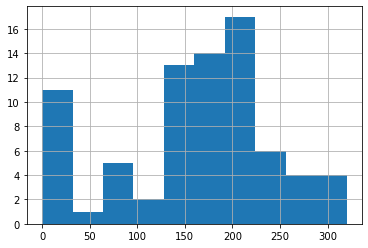

<AxesSubplot:>

fiber


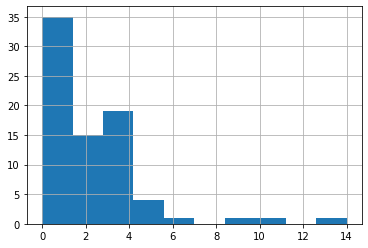

<AxesSubplot:>

carbo


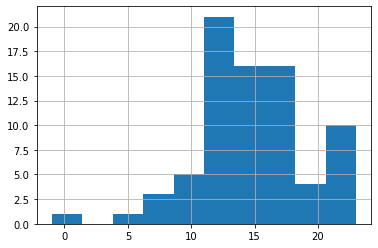

<AxesSubplot:>

sugars


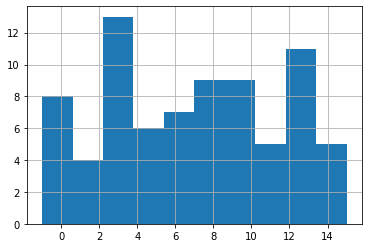

<AxesSubplot:>

potass


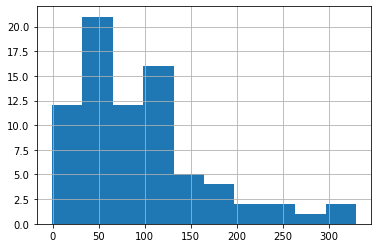

<AxesSubplot:>

vitamins


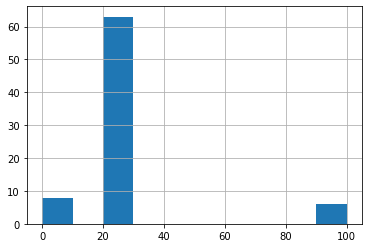

<AxesSubplot:>

shelf


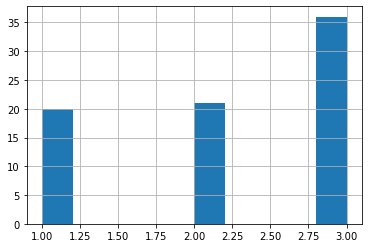

<AxesSubplot:>

weight


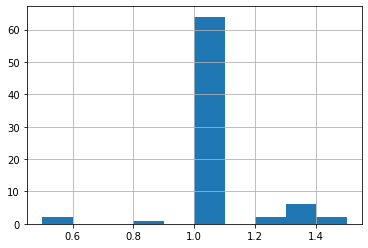

<AxesSubplot:>

cups


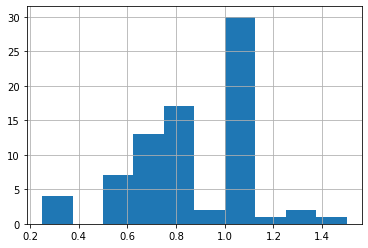

<AxesSubplot:>

rating


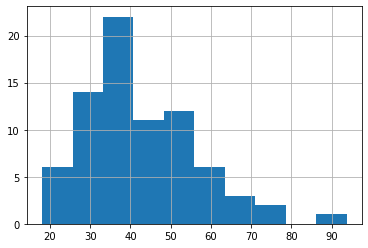

In [5]:
for col in cols: 
    raw_data[col].hist()
    print(col)
    plt.show()
    

#### Visualize data

In [6]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [7]:
correl = raw_data.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [8]:
if diab == 0:
    mfr_set = list(raw_data['mfr'].unique())
    mfr_set

['N', 'Q', 'K', 'R', 'G', 'P', 'A']

In [9]:
# visualize data by Outcome
if diab:
    y_col = 'BMI'
    x_col = 'Glucose'

    full_df = raw_data[[x_col, y_col, 'Outcome']].sort_values(by=x_col)
    plot_data = []
    df = full_df[full_df.Outcome == 0]
    plot_data.append(go.Scatter(x= df[x_col], y= df[y_col] , mode = 'markers'))

    layout = go.Layout(xaxis = dict(title=x_col), yaxis = dict(title= y_col), 
                       title = 'Plot of {} versus {}'.format(y_col, x_col))
    df = full_df[full_df.Outcome == 1]
    plot_data.append(go.Scatter(x= df[x_col], y= df[y_col] , mode = 'markers'))

    layout = go.Layout(xaxis = dict(title=x_col), yaxis = dict(title= y_col), 
                       title = 'Plot of {} versus {}'.format(y_col, x_col))
    fig = go.Figure(data= plot_data, layout=layout)
    plotly.offline.iplot(fig)
    
else: 
    y_col = 'rating'
    x_col = 'calories'
    full_df = raw_data[[x_col, y_col, 'mfr']].sort_values(by=x_col)
    plot_data = []    
    for mf in mfr_set:
        df = full_df[full_df.mfr == mf]
        plot_data.append(go.Scatter(x= df[x_col], y= df[y_col] , mode = 'markers'))

        layout = go.Layout(xaxis = dict(title=x_col), yaxis = dict(title= y_col), 
                           title = 'Plot of {} versus {}'.format(y_col, x_col))
    fig = go.Figure(data= plot_data, layout=layout)
    plotly.offline.iplot(fig)